# 데이터 타입에 따라 달라지는 시각화 기법

- 단일변수
    - 수치형(연속형): 데이터의 분포 확인(Histogram, KDE, Box Plot, Violin Plot, ...)
    - 범주형: 각 항목의 빈도수(Bar Chart, Pie Chart, ...)
- 다변수(여러 변수들 간의 관계를 확인할 때)
    - X 범주형 / Y 수치형
    - X 수치형 / Y 수치형
    - X 순서형 / Y 연속형
    - 기타(관리도 / 파레토도 /히트맵/ 지도 / ...)
- 시각화의 가장 큰 단점은 주관적 해석의 여지가 높음. 

# 데이터 분석에 필요한 라이브러리 종류

- pandas(panel dataset): 정형 데이터를 다루고 처리하는 라이브러리
    - 데이터 불러오기 / 저장 / 데이터 전처리 / 간단한 통계분석
- matplot(matlab plot): 데이터의 시각화를 처리하는 라이브러리
    - 연속형 자료들의 시각화
    - 시각화 옵션
- seaborn: 데이터의 시각화를 처리하는 라이브러리
    - 통계 분석 시각화
- plotly: 인터렉티브 시각화를 처리하는 라이브러리
    - web 어플리케이션 시각화
- scipy(science python): 응용 통계 연산(가설검정, CDA)
    - 통계적 가설검정 수행
    - 회귀분석
- scikit learn(science + tool kit + learning): 기계학습을 처리하는 라이브러리
    - 특성 공학
    - 학습 알고리즘

# 지진 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', size=16)

In [2]:
df = pd.read_csv('./datasets/cleaned_earthquark.csv')
df.head()

title  magnitude         date_time  cdi  \
0          M 6.5 - 42 km W of Sola, Vanuatu        6.5  16-08-2023 12:47    7   
1  M 6.5 - 43 km S of Intipucá, El Salvador        6.5  19-07-2023 00:22    8   
2  M 6.6 - 25 km ESE of Loncopué, Argentina        6.6  17-07-2023 03:05    7   
3     M 7.2 - 98 km S of Sand Point, Alaska        7.2  16-07-2023 06:48    6   
4                  M 7.3 - Alaska Peninsula        7.3  16-07-2023 06:48    0   

   mmi    alert  tsunami  sig net  nst      dmin    gap magType    depth  \
0    4    green        0  657  us  114  7.177000   25.0     mww  192.955   
1    6   yellow        0  775  us   92  0.679000   40.0     mww   69.727   
2    5    green        0  899  us   70  1.634000   28.0     mww  171.371   
3    6    green        1  860  us  173  0.907000   36.0     mww   32.571   
4    5  Unknown        1  820  at   79  0.879451  172.8      Mi   21.000   

   latitude  longitude   new_location  new_continent  
0  -13.8814   167.1580        Vanuatu        Oceania  
1   12.8140   -88.1265    El Salvador  North America  
2  -38.1911   -70.3731      Argentina  South America  
3   54.3844  -160.6990  United States  North America  
4   54.4900  -160.7960  United States  North America

In [3]:
# 'object'형을 'datetime' 형으로 변경
df['date_time'] = pd.to_datetime(df['date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          1000 non-null   object        
 1   magnitude      1000 non-null   float64       
 2   date_time      1000 non-null   datetime64[ns]
 3   cdi            1000 non-null   int64         
 4   mmi            1000 non-null   int64         
 5   alert          1000 non-null   object        
 6   tsunami        1000 non-null   int64         
 7   sig            1000 non-null   int64         
 8   net            1000 non-null   object        
 9   nst            1000 non-null   int64         
 10  dmin           1000 non-null   float64       
 11  gap            1000 non-null   float64       
 12  magType        1000 non-null   object        
 13  depth          1000 non-null   float64       
 14  latitude       1000 non-null   float64       
 15  longitude      1000 no

In [4]:
# year, month, day, day_name, week 추출
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['day_name'] = df['date_time'].dt.day_name()
df['week'] = df['date_time'].dt.isocalendar().week

df.head()


title  magnitude           date_time  \
0          M 6.5 - 42 km W of Sola, Vanuatu        6.5 2023-08-16 12:47:00   
1  M 6.5 - 43 km S of Intipucá, El Salvador        6.5 2023-07-19 00:22:00   
2  M 6.6 - 25 km ESE of Loncopué, Argentina        6.6 2023-07-17 03:05:00   
3     M 7.2 - 98 km S of Sand Point, Alaska        7.2 2023-07-16 06:48:00   
4                  M 7.3 - Alaska Peninsula        7.3 2023-07-16 06:48:00   

   cdi  mmi    alert  tsunami  sig net  nst  ...    depth  latitude longitude  \
0    7    4    green        0  657  us  114  ...  192.955  -13.8814  167.1580   
1    8    6   yellow        0  775  us   92  ...   69.727   12.8140  -88.1265   
2    7    5    green        0  899  us   70  ...  171.371  -38.1911  -70.3731   
3    6    6    green        1  860  us  173  ...   32.571   54.3844 -160.6990   
4    0    5  Unknown        1  820  at   79  ...   21.000   54.4900 -160.7960   

    new_location  new_continent  year month day   day_name  week  
0        Vanuatu        Oceania  2023     8  16  Wednesday    33  
1    El Salvador  North America  2023     7  19  Wednesday    29  
2      Argentina  South America  2023     7  17     Monday    29  
3  United States  North America  2023     7  16     Sunday    28  
4  United States  North America  2023     7  16     Sunday    28  

[5 rows x 23 columns]

# 단일변수
    - 범주형: 항목과 분포

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          1000 non-null   object        
 1   magnitude      1000 non-null   float64       
 2   date_time      1000 non-null   datetime64[ns]
 3   cdi            1000 non-null   int64         
 4   mmi            1000 non-null   int64         
 5   alert          1000 non-null   object        
 6   tsunami        1000 non-null   int64         
 7   sig            1000 non-null   int64         
 8   net            1000 non-null   object        
 9   nst            1000 non-null   int64         
 10  dmin           1000 non-null   float64       
 11  gap            1000 non-null   float64       
 12  magType        1000 non-null   object        
 13  depth          1000 non-null   float64       
 14  latitude       1000 non-null   float64       
 15  longitude      1000 no

In [6]:
# df['magType'].unique()
df['alert'].unique()

array(['green', 'yellow', 'Unknown', 'orange', 'red'], dtype=object)

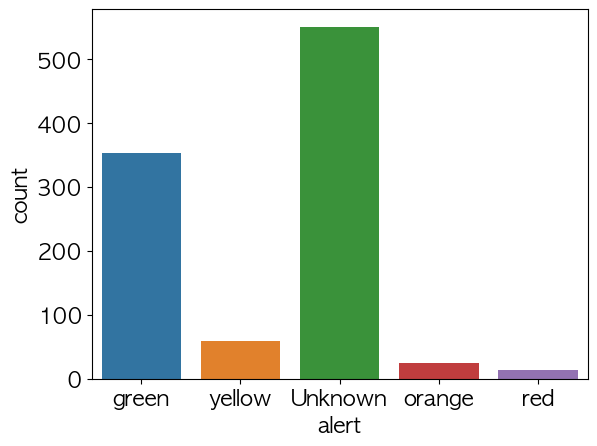

In [7]:
# countplot: 범주형 데이터 항목별 빈도수 확인
sns.countplot(data=df, x='alert')
plt.savefig('countplot.png')

<AxesSubplot:xlabel='alert', ylabel='count'>

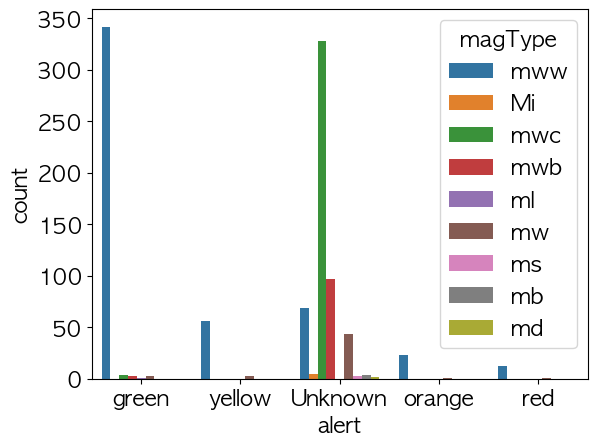

In [8]:
# hue: 범주형 항목에 대한 그래프 중첩
sns.countplot(data=df, x='alert', hue='magType')

<AxesSubplot:xlabel='alert', ylabel='count'>

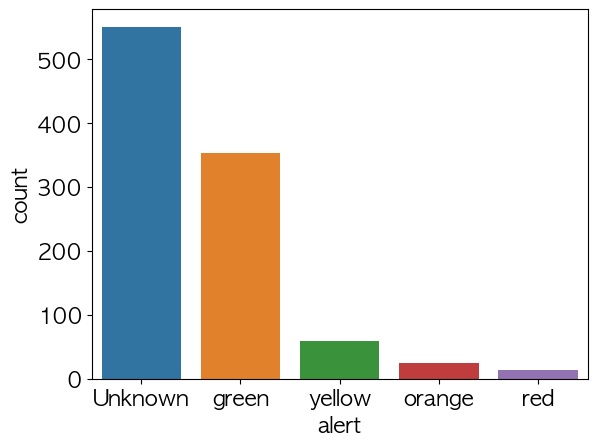

In [9]:
# order: 범주형 데이터에 대해 순서를 지정하여 출력
sns.countplot(data=df, x='alert', order=['Unknown', 'green', 'yellow', 'orange', 'red'])

# 단일변수
    - 수치형: histogram / kde / boxplot
    - histogram: 수치 데이터의 빈도수를 막대그래프로 표시

In [10]:
# matplotlib_inline.backend_inline 모듈 임포트
from matplotlib_inline.backend_inline import set_matplotlib_formats
# 'retina' 포맷 설정
set_matplotlib_formats('retina')

%matplotlib inline

<AxesSubplot:xlabel='depth', ylabel='Count'>

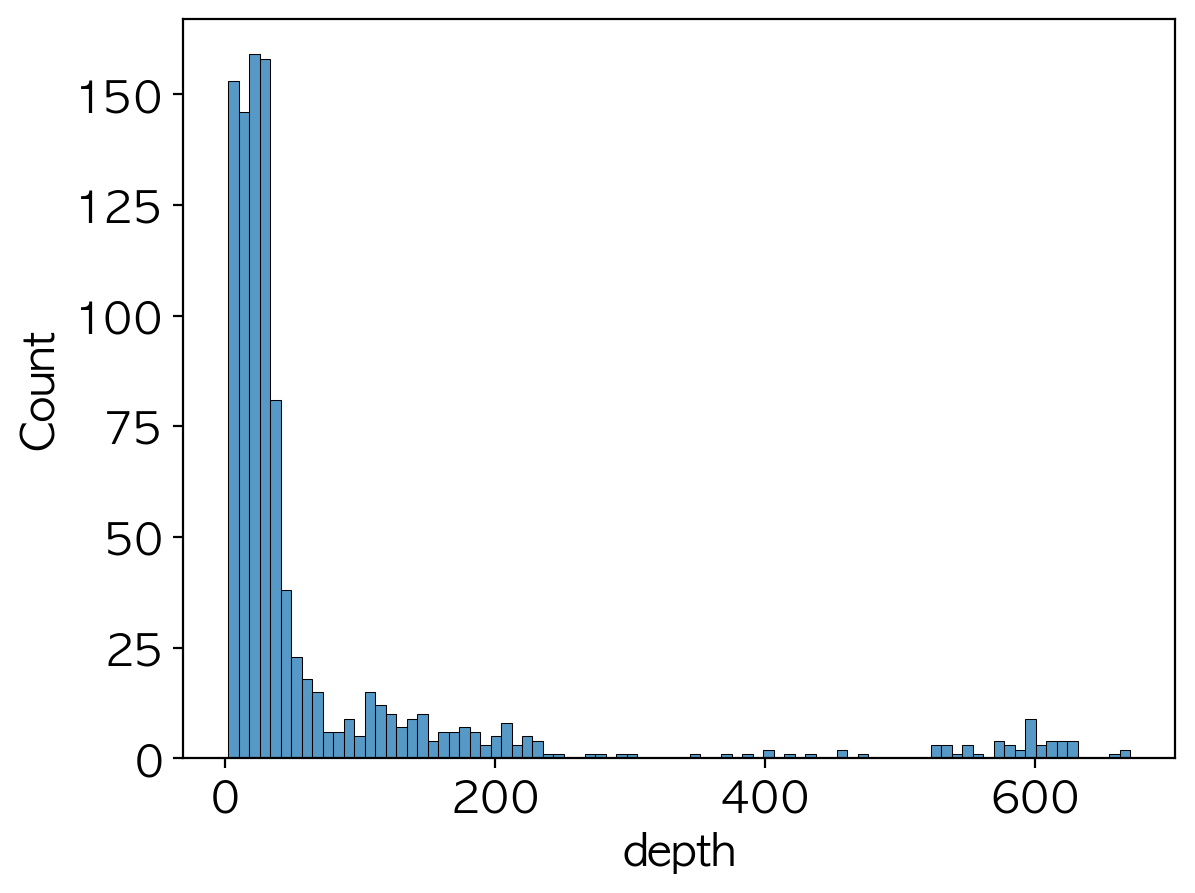

In [11]:
# 진원지 깊이에 따른 분포
sns.histplot(data=df, x='depth')

<AxesSubplot:xlabel='depth', ylabel='Count'>

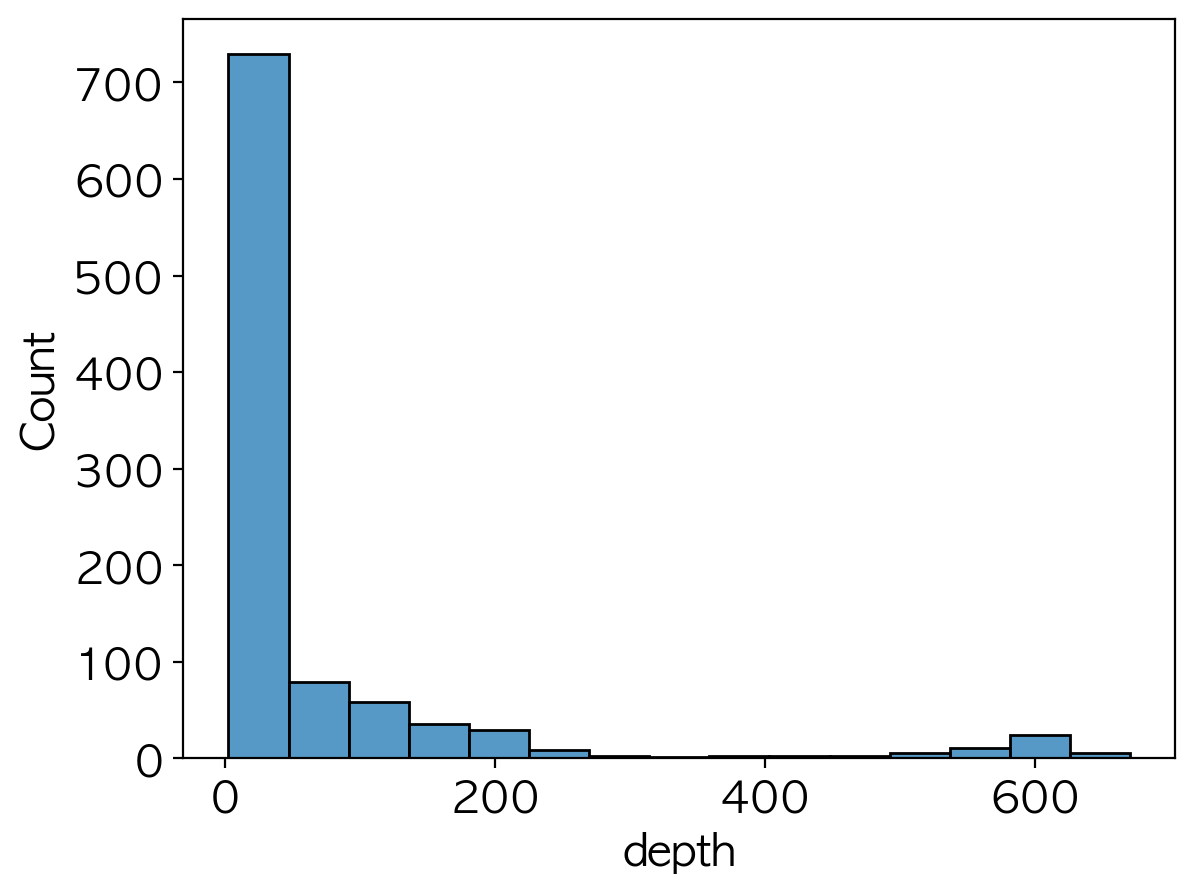

In [12]:
# bins: 수치형 변수의 계급의 수를 결정
sns.histplot(data=df, x='depth', bins=15)

<AxesSubplot:xlabel='depth', ylabel='Count'>

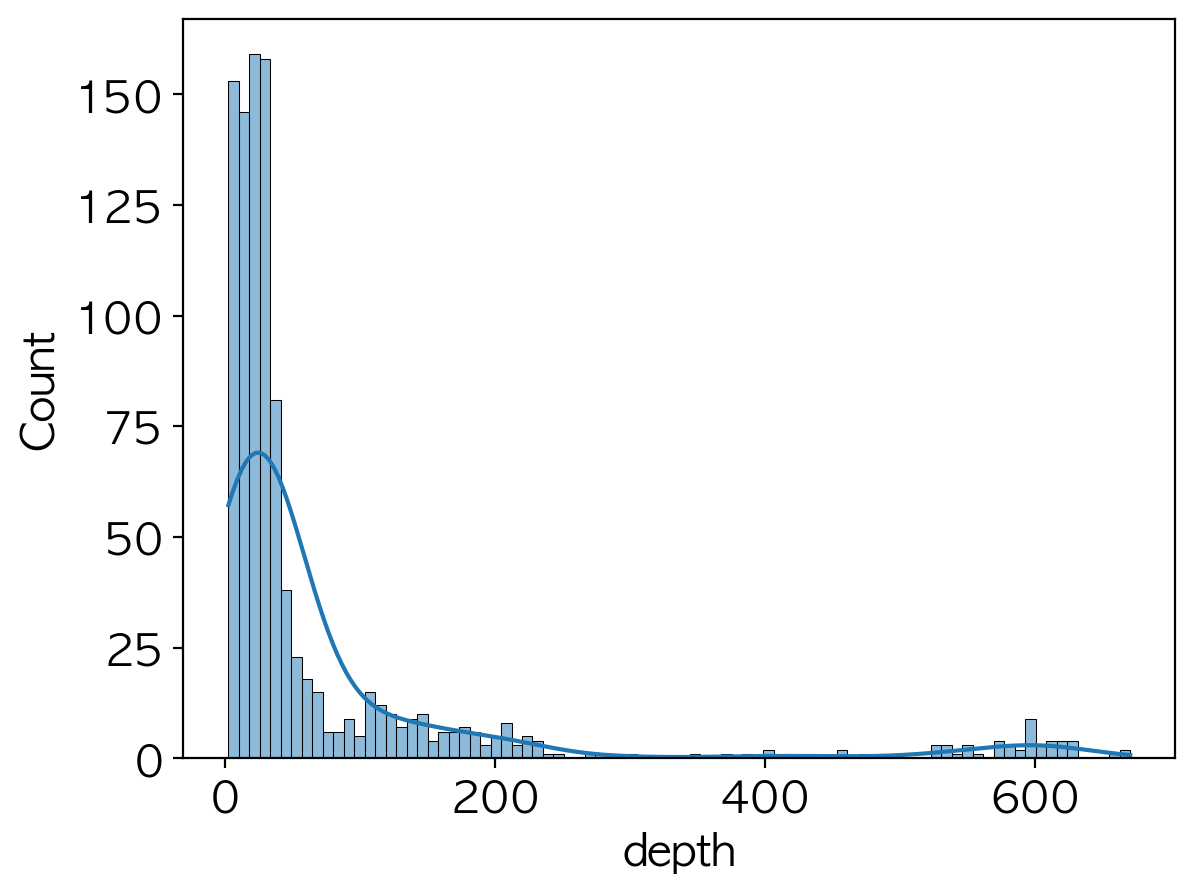

In [13]:
# KDE: Kernel Density Estimator
sns.histplot(data=df, x='depth', kde=True)

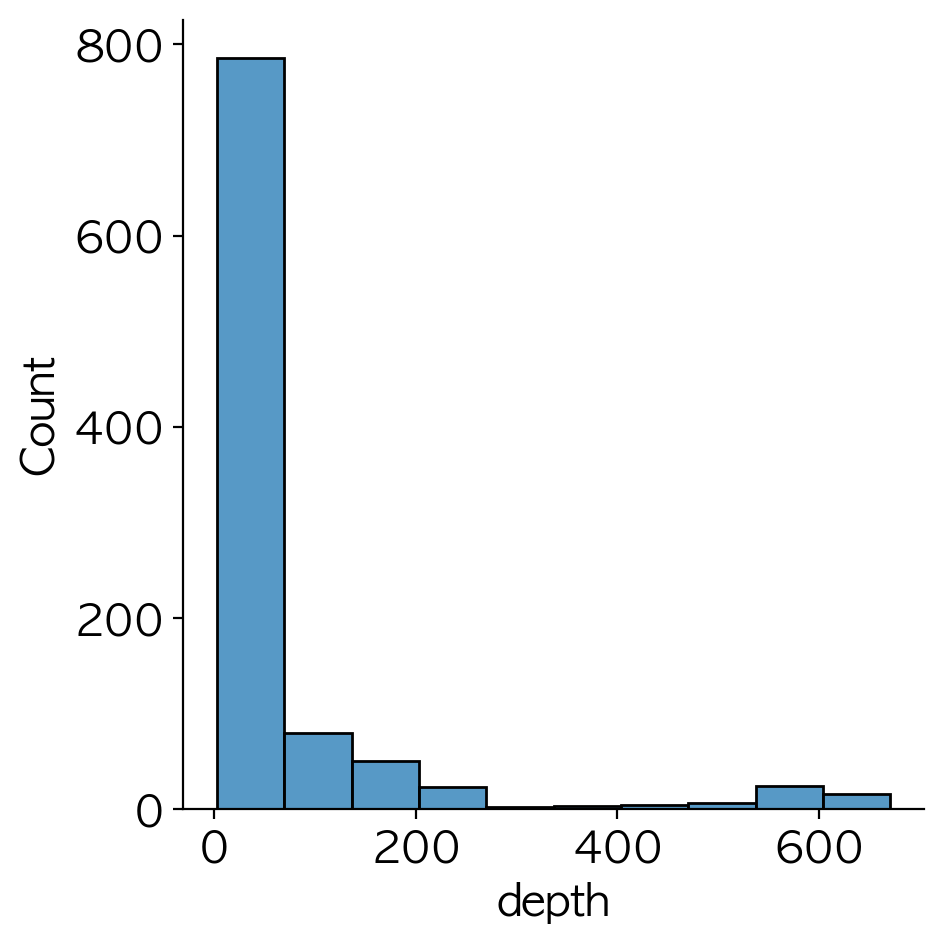

In [14]:
# displot()을 이용한 히스토그램 그리기
sns.displot(data=df, x='depth', kind='hist', bins=10)

Text(0.5, 1.0, '지진 강도의 분포')

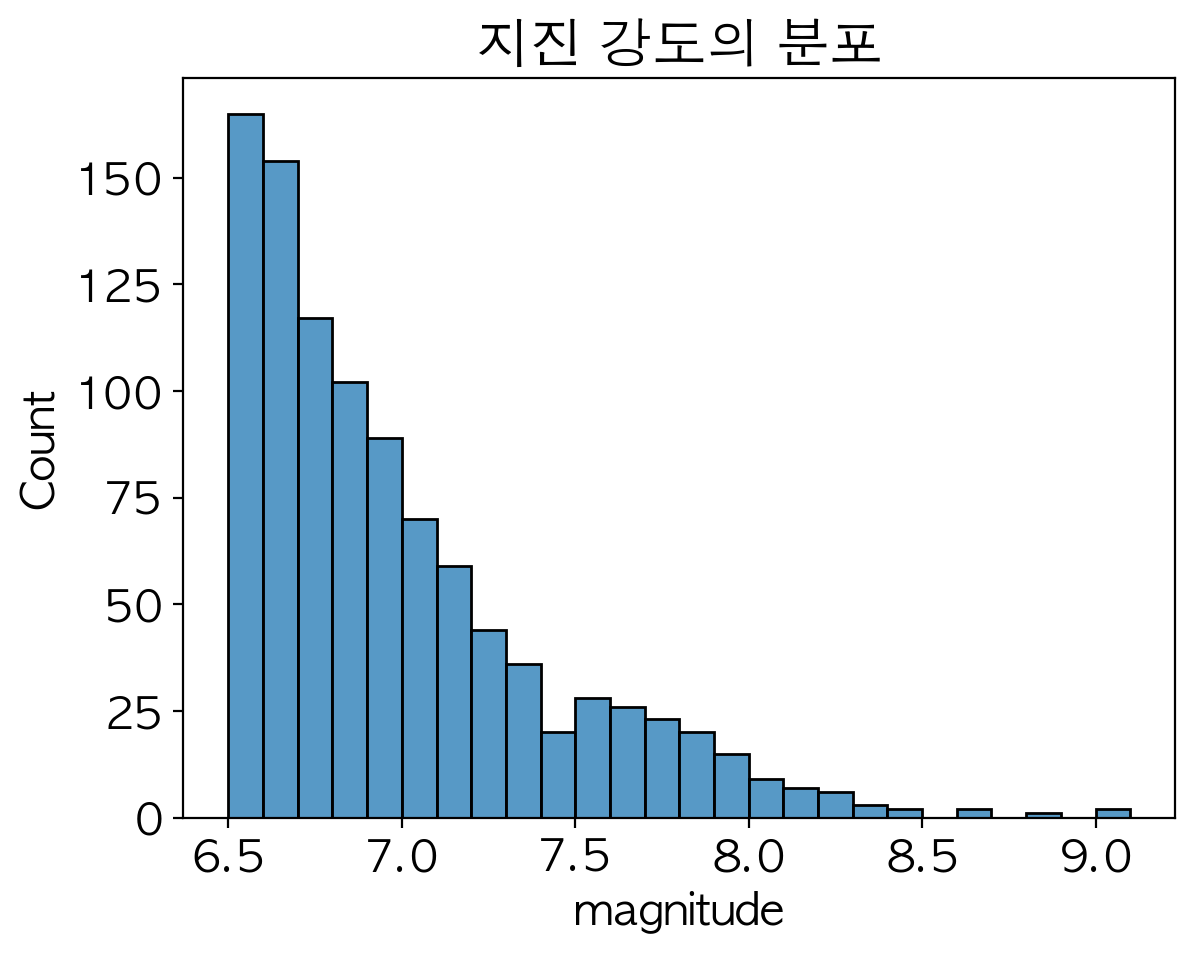

In [15]:
# 지진 강도(magnitude)에 따른 분포
sns.histplot(data=df, x='magnitude')
plt.title('지진 강도의 분포')

<AxesSubplot:xlabel='depth'>

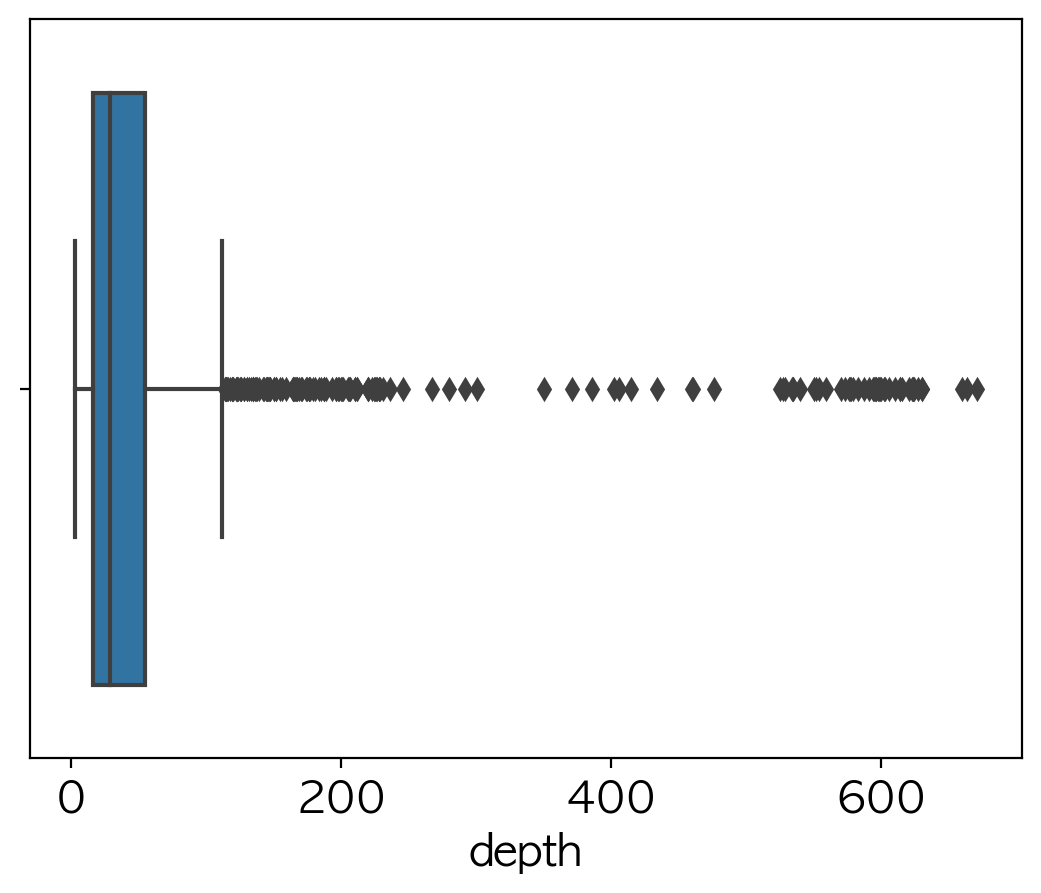

In [16]:
# boxplot
# QR1: 전체 데이터의 25%가 모여있는 구간
# QR2: 중위수가 위치한 지점
# QR3: 전체 데이터의 75%가 모여있는 구간
# IQR(Inter Quantile Range): 중위수를 기점으로 전체 데이터의 50%가 모여있는 구간
sns.boxplot(data=df, x='depth')
# plt.ylim(0,100)

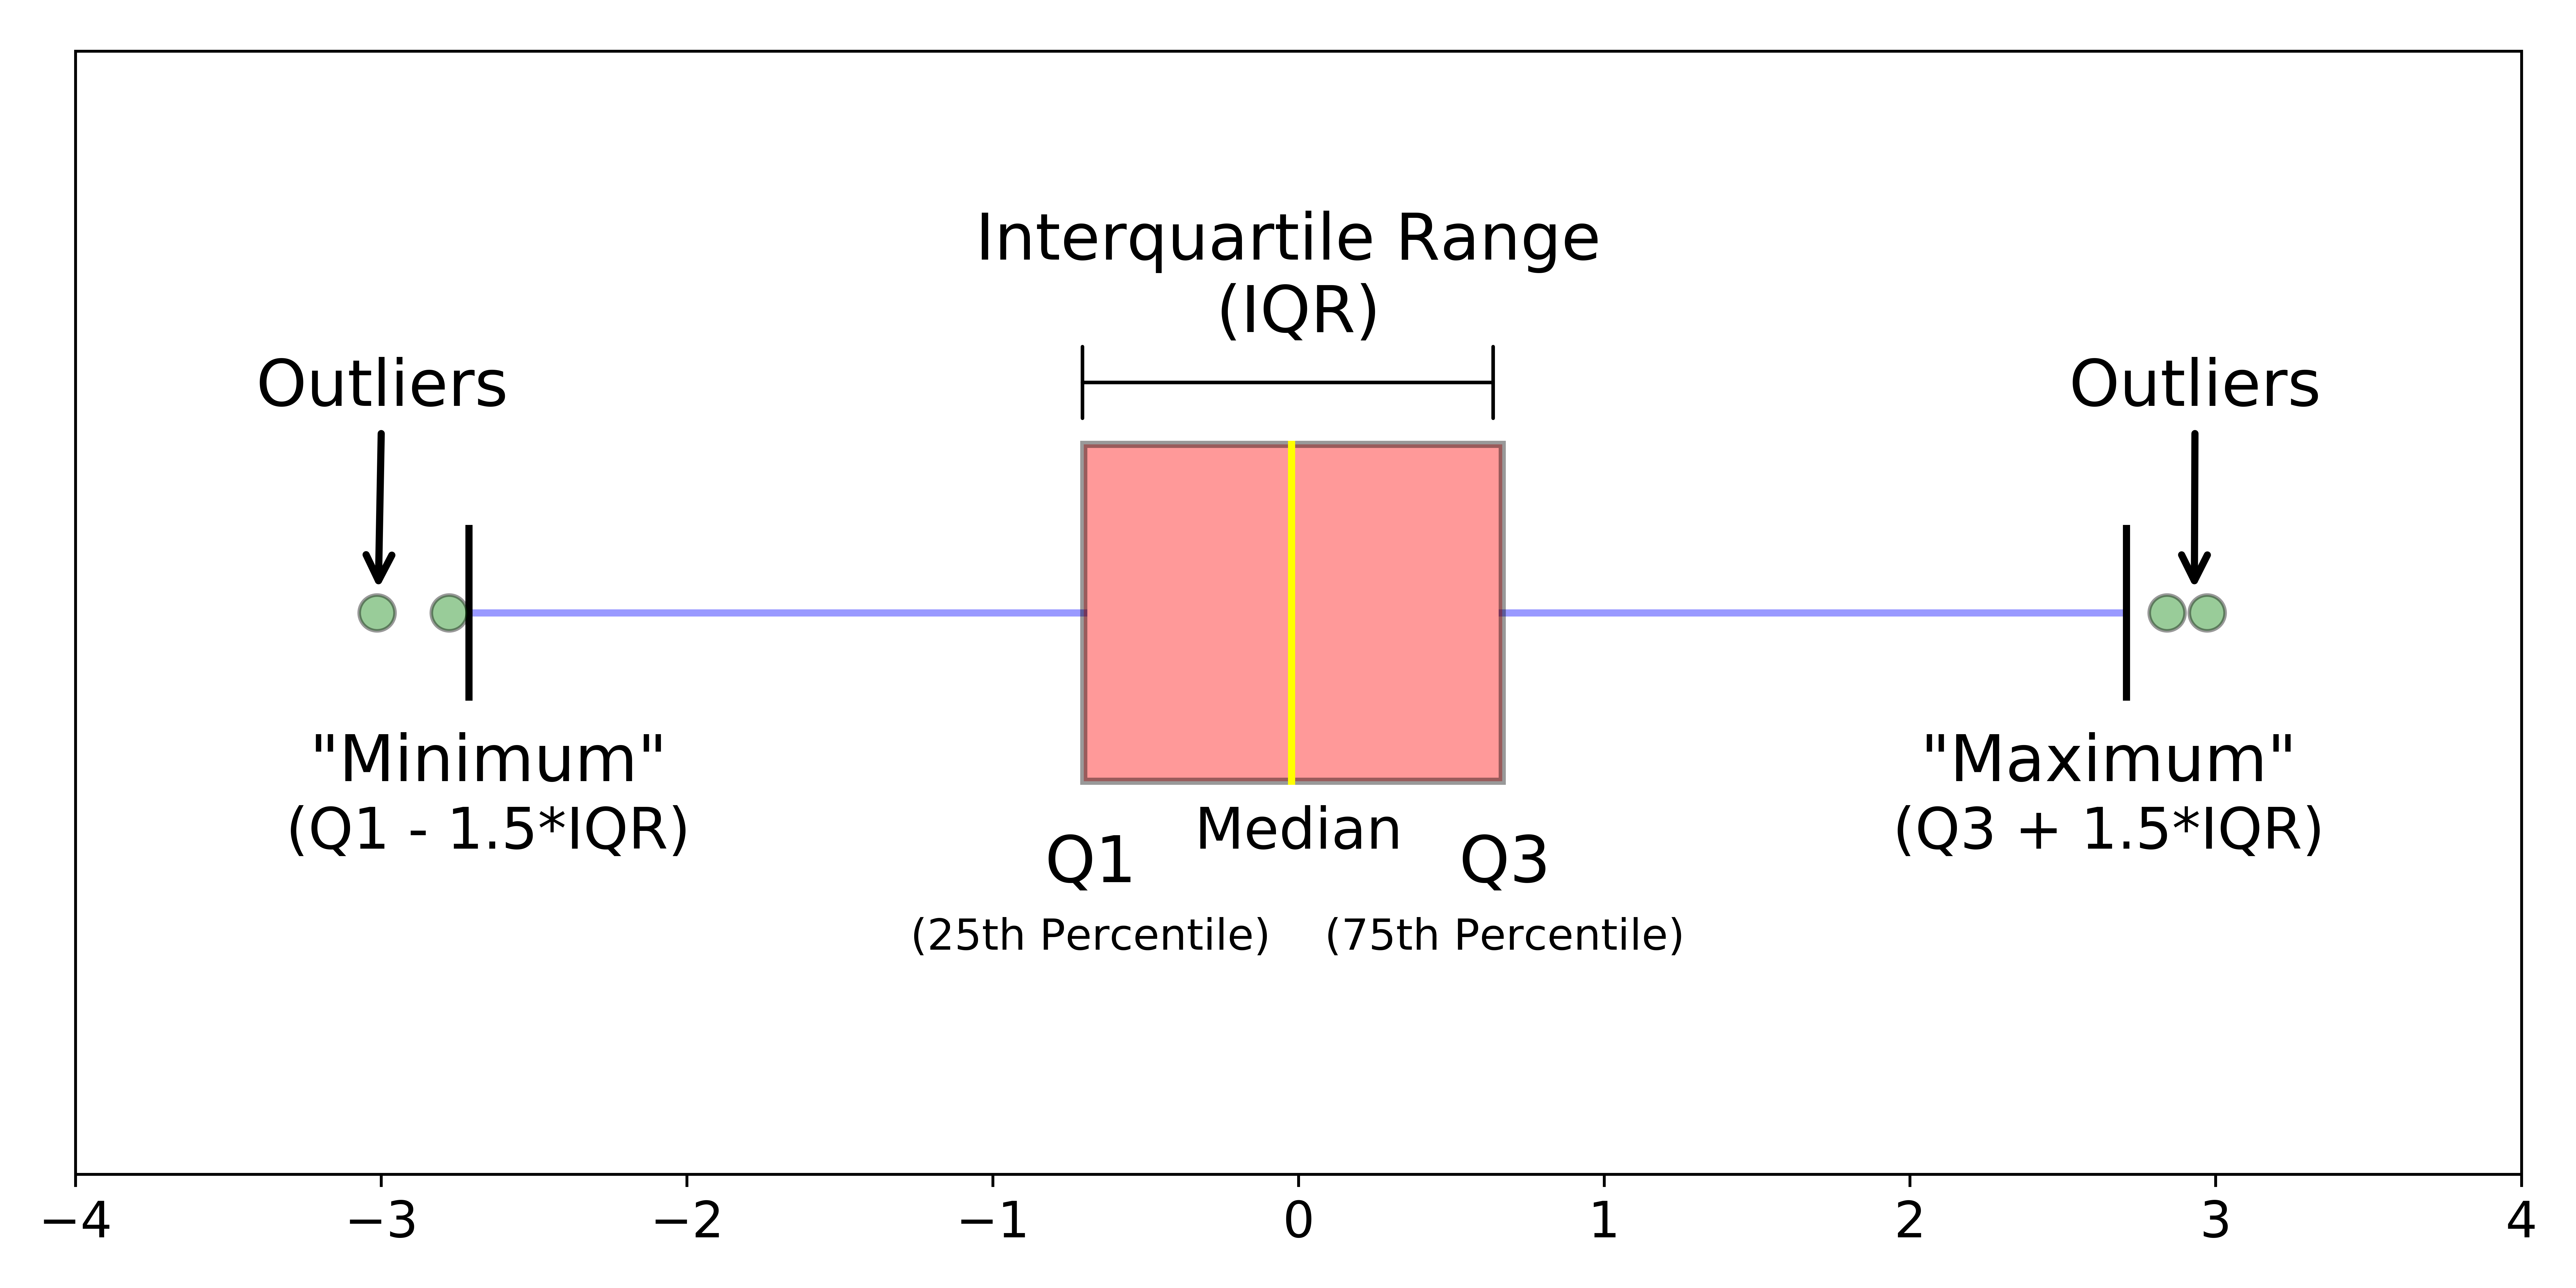

# 다변수 시각화1
- X: 범주형 / Y:수치형

<AxesSubplot:xlabel='alert', ylabel='magnitude'>

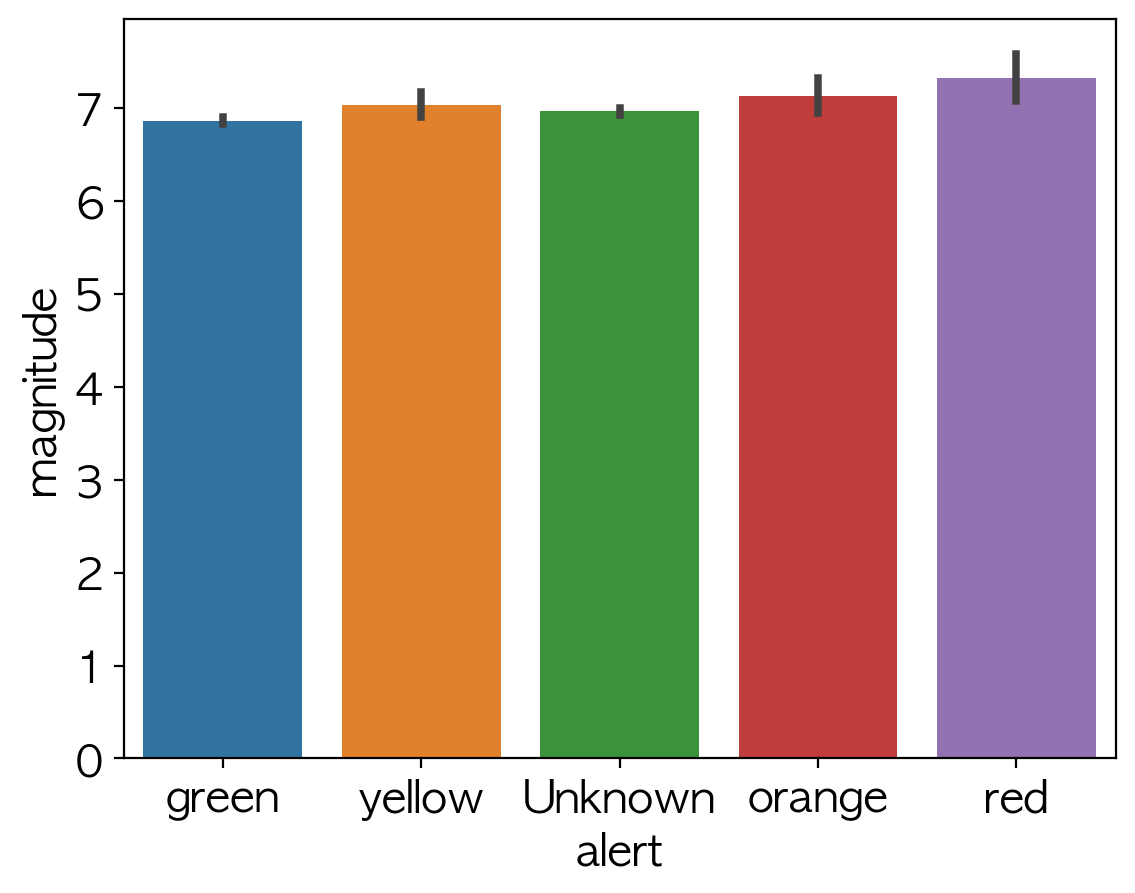

In [17]:
# 신뢰구간: 표본으로부터 추정된 모집단의 평균이 포함될 수 있는 95% 구간
sns.barplot(data=df, x='alert', y='magnitude', estimator='mean')

In [18]:
# plotly: 상호작용이 가능한 시각화 그래프 출력 라이브러리
# pip install plotly
import plotly.express as px

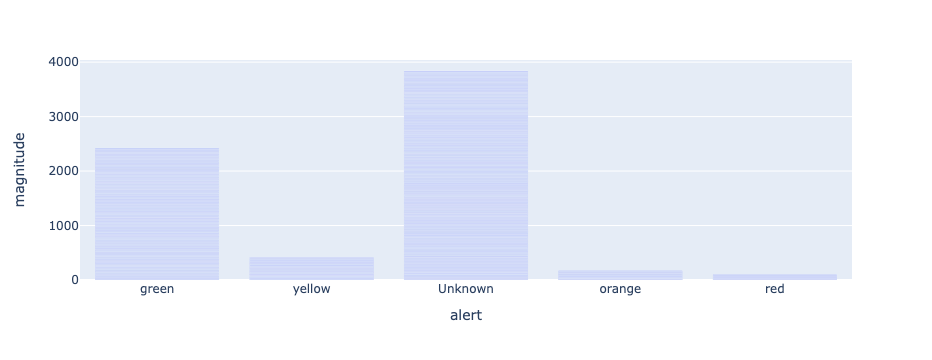

In [19]:
px.bar(df, x='alert', y='magnitude')

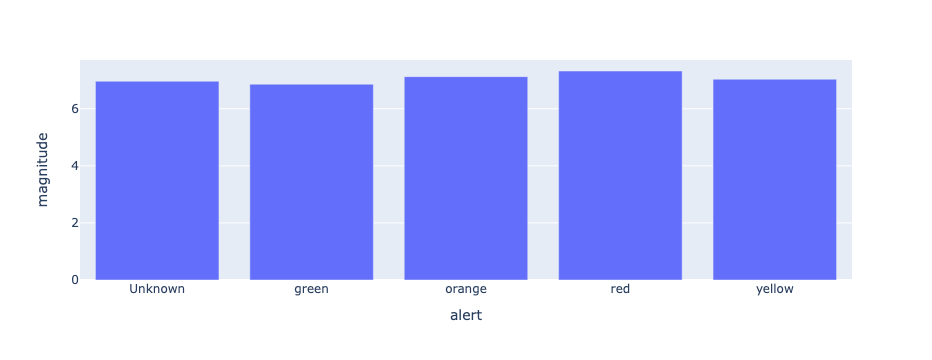

In [20]:
# bar chart이니, x(범주형), y(수치형)의 평균값 pivot table을 만들어서 바로 plot을 하는 것.
df_pivot = df.pivot_table(index='alert', values='magnitude').reset_index()
px.bar(df_pivot, x='alert', y='magnitude')

# 다변수 시각화2
- X: 수치형 / Y:수치형

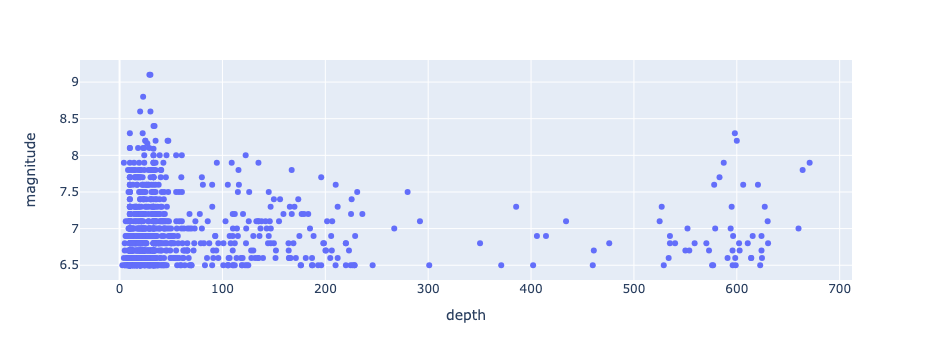

In [21]:
px.scatter(df, x='depth', y='magnitude')

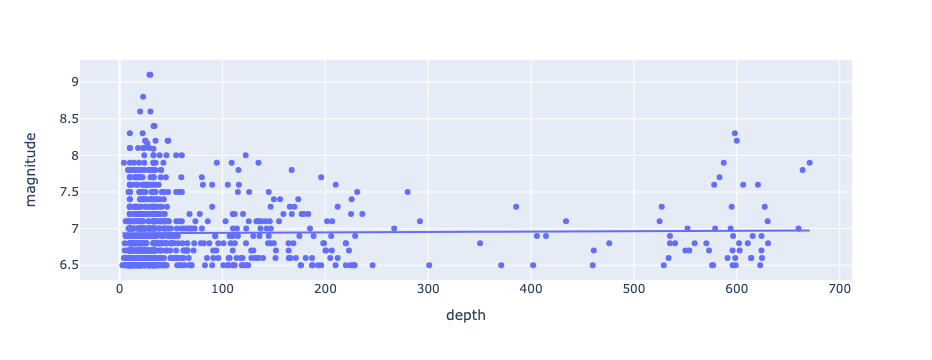

In [22]:
# trendline에서 오류가 발생한다면 --> !pip install statsmodels
px.scatter(df, x='depth', y='magnitude', trendline='ols')

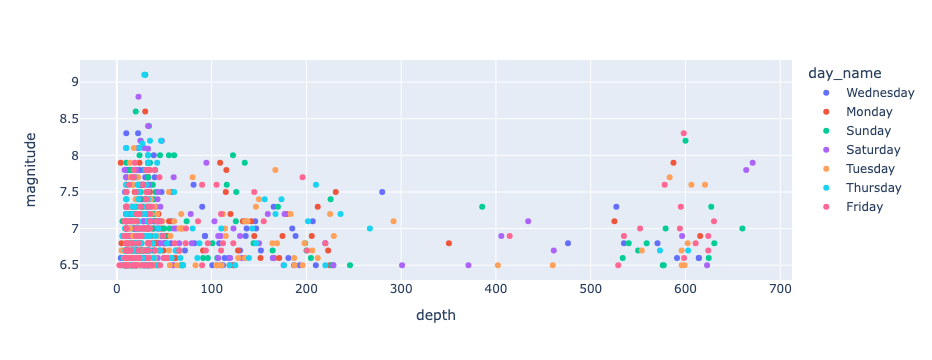

In [23]:
px.scatter(df, x='depth', y='magnitude', color='day_name')

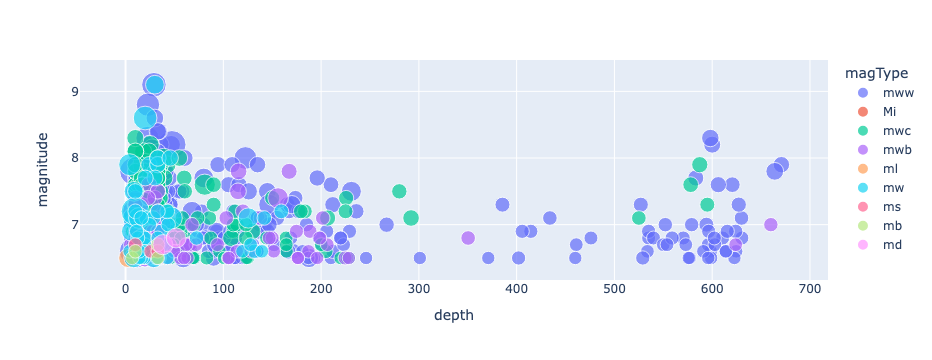

In [24]:
px.scatter(df, x='depth', y='magnitude', size='sig', color='magType')

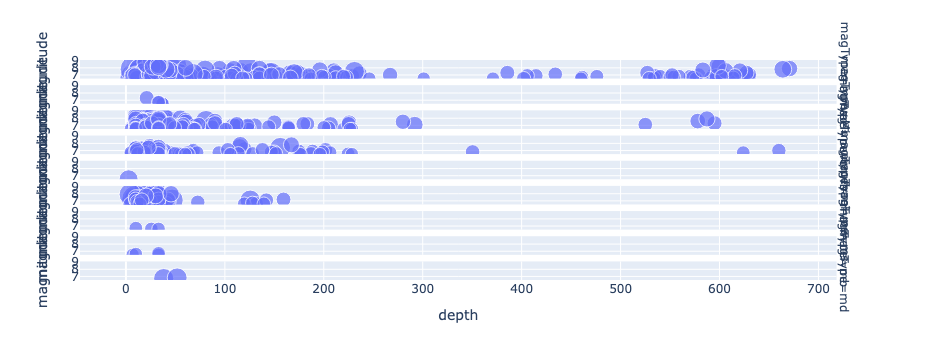

In [25]:
# facet_row, facet_col: subplot 옵션
px.scatter(df, x='depth', y='magnitude', size='sig', facet_row='magType')

# 다변수 시각화3
- X(순서형) / Y(수치형)

(10227.0, 17532.0)

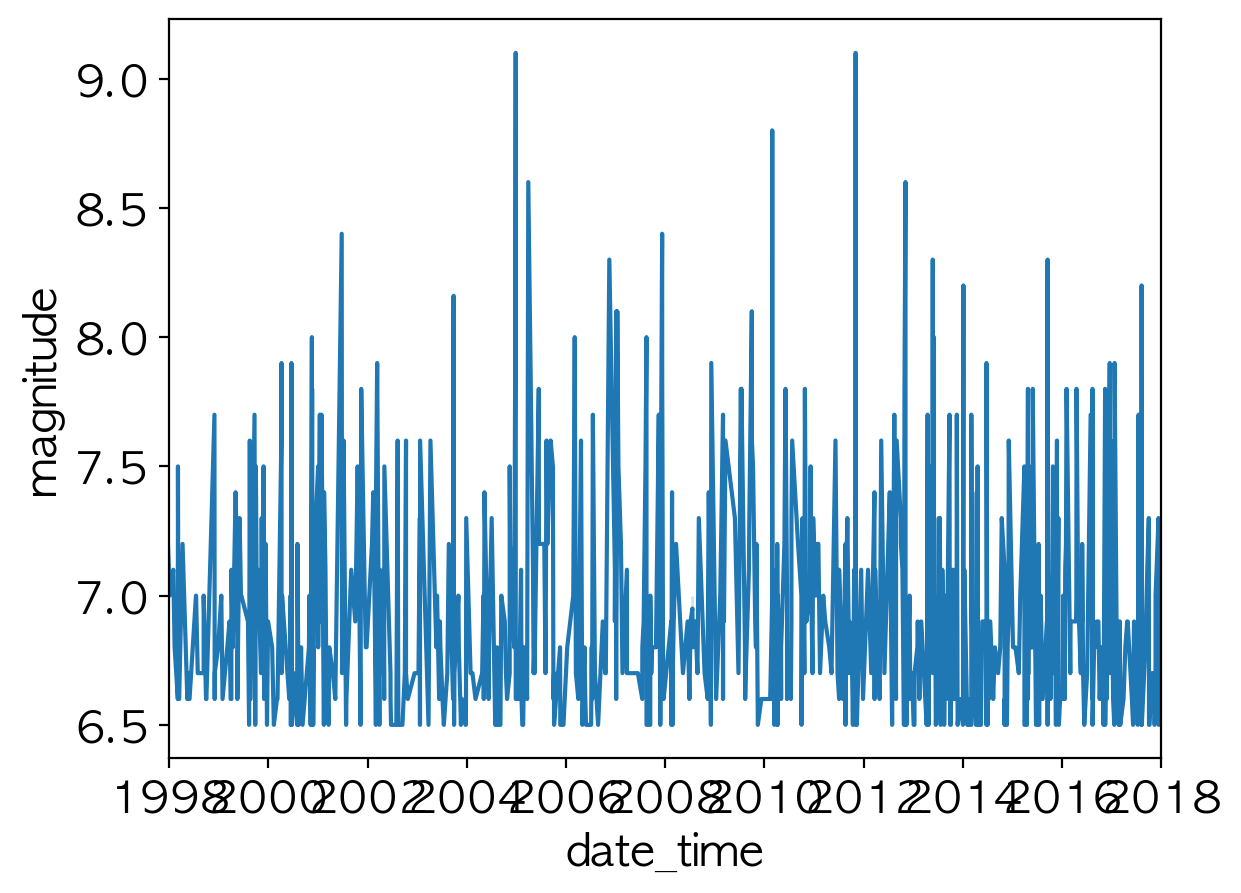

In [26]:
sns.lineplot(data=df, x='date_time', y='magnitude')
plt.xlim(pd.to_datetime('1998'), pd.to_datetime('2018'))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016'),
  Text(22, 0, '2017'),
  Text(23, 0, '2018'),
  Text(24, 0, '2019'),
  Text(25, 0, '2020'),
  Text(26, 0, '2021'),
  Text(27, 0, '2022'),
  Text(28, 0, '2023')])

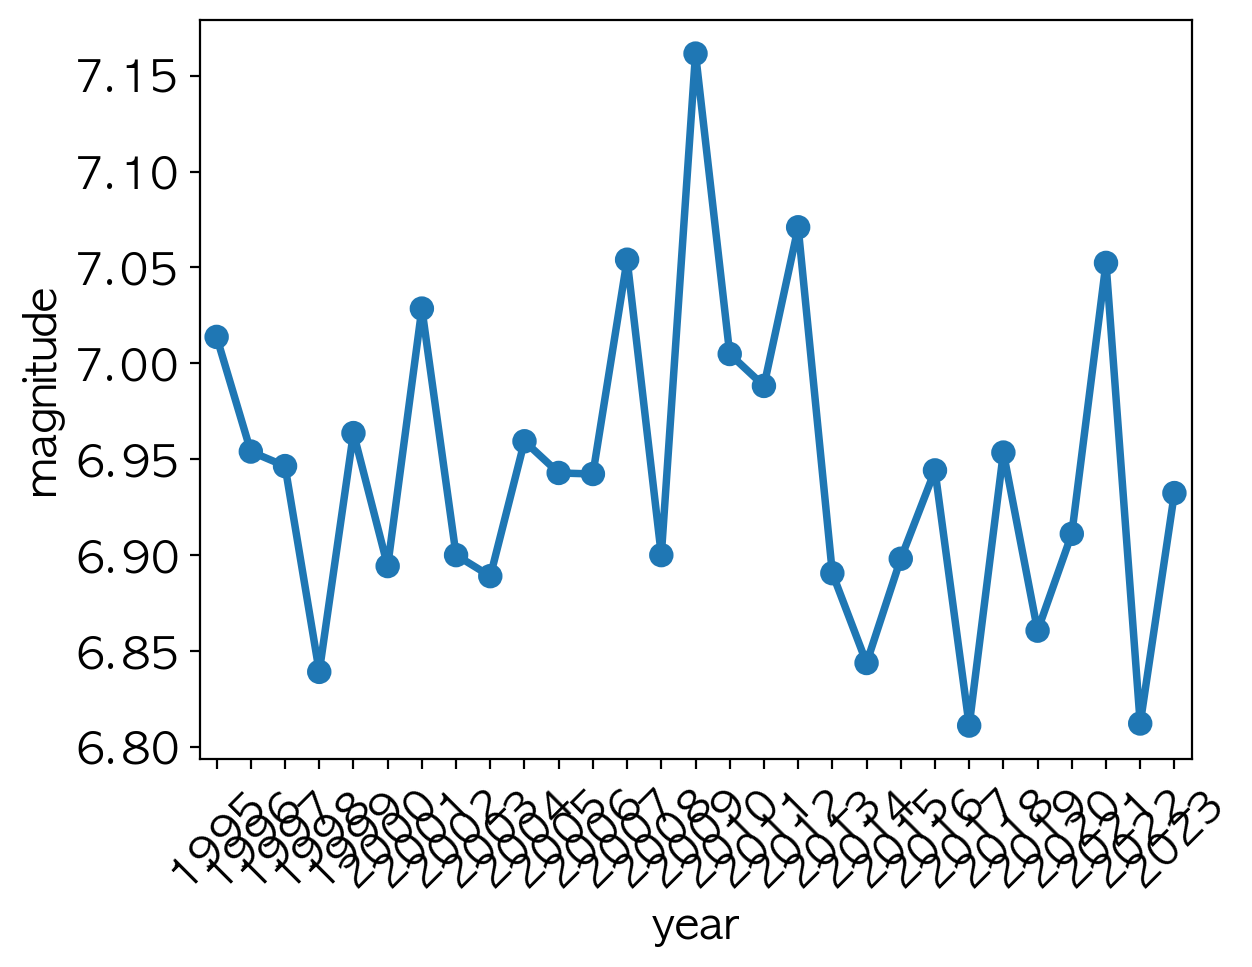

In [27]:
sns.pointplot(data=df, x='year', y='magnitude', errorbar=None)
plt.xticks(rotation=45) 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          1000 non-null   object        
 1   magnitude      1000 non-null   float64       
 2   date_time      1000 non-null   datetime64[ns]
 3   cdi            1000 non-null   int64         
 4   mmi            1000 non-null   int64         
 5   alert          1000 non-null   object        
 6   tsunami        1000 non-null   int64         
 7   sig            1000 non-null   int64         
 8   net            1000 non-null   object        
 9   nst            1000 non-null   int64         
 10  dmin           1000 non-null   float64       
 11  gap            1000 non-null   float64       
 12  magType        1000 non-null   object        
 13  depth          1000 non-null   float64       
 14  latitude       1000 non-null   float64       
 15  longitude      1000 no

# Mission

- data: cleaned_earthquark.csv
- 1) 'date_time'에서 '연도', '월'을 추출하시오.
  2) '연도'별 'tsunami'의 합을 계산하시오.
  3) 'alert'에서 'red'항목만 추출하여, 'new_continent'를 x축으로, 'sig'를 y축으로, 대륙별 sig의 평균을 계산하시오.
  4) 'alert'에서 'green'만 추출하여, 'sig'가 높은 순서대로 데이터를 정렬하시오.